In [2]:
import xarray as xr
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 3

# Analysis of Biharmonic Dynamic Smagorinsky Model online

In [63]:
prog_2 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-2/prog__0010_014.nc', decode_times=False)
prog_6 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-6/prog__0010_014.nc', decode_times=False)
prog_plus = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-2-plus/prog__0010_014.nc', decode_times=False)
bare_006 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/bare-0.06/prog__0010_014.nc', decode_times=False)
bare_001 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/bare-0.01/prog__0010_014.nc', decode_times=False)

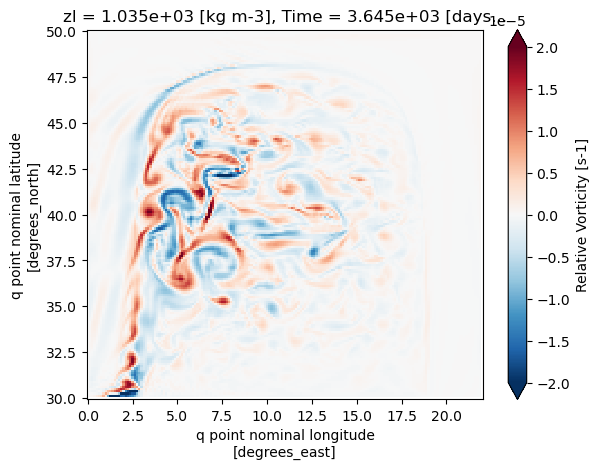

In [79]:
prog_plus.RV.isel(Time=-1,zl=0).plot(vmin=-2e-5)

In [85]:
series_plus = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-2-plus/series__0009_365.nc', decode_times=False)
series_2 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-2/series__0009_365.nc', decode_times=False)
series_6 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-6/series__0009_365.nc', decode_times=False)

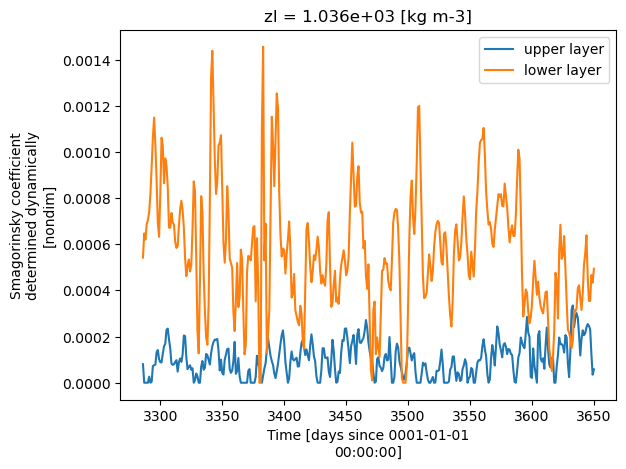

In [90]:
series_6.smag_const.isel(zl=0).plot(label='upper layer')
series_6.smag_const.isel(zl=1).plot(label='lower layer')
plt.legend()

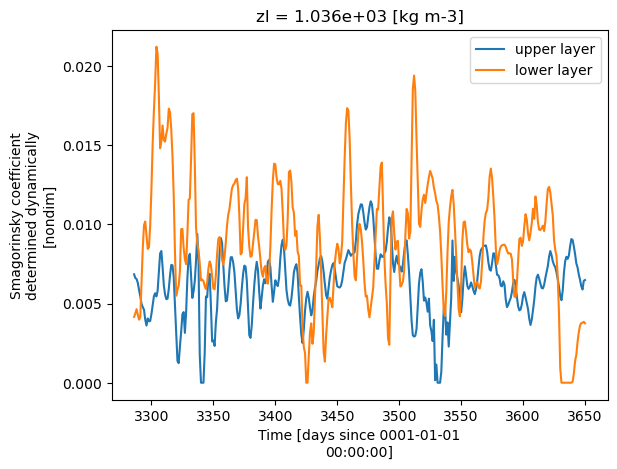

In [91]:
series_2.smag_const.isel(zl=0).plot(label='upper layer')
series_2.smag_const.isel(zl=1).plot(label='lower layer')
plt.legend()

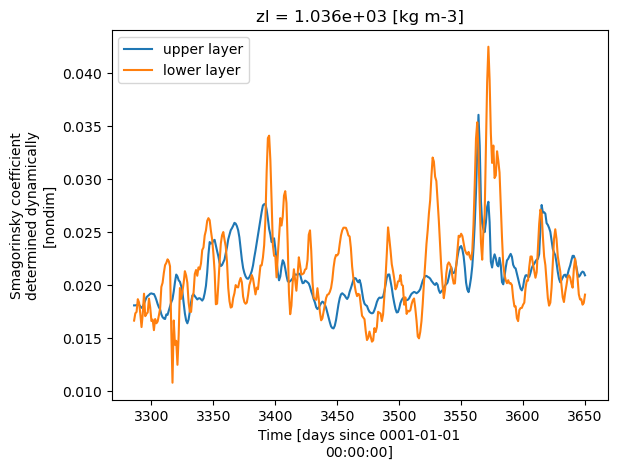

In [93]:
series_plus.smag_const.isel(zl=0).plot(label='upper layer')
series_plus.smag_const.isel(zl=1).plot(label='lower layer')
plt.legend()

In [200]:
pg23 = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/DSM-kappa-sqrt-2/pg23__0011_009.nc', decode_times=False)

In [158]:
static = xr.open_mfdataset('/home/ctrsp-2024/pp2681/experiments/R8/bare-0.06/ocean_geometry.nc', decode_times=False).rename(
    {'lath': 'yh', 'latq':'yq', 'lonh':'xh', 'lonq':'xq'}).chunk({})
static.wet[0,:] = 0
static.wet[-1,:] = 0
static.wet[:,0] = 0
static.wet[:,-1] = 0

In [165]:
import gcm_filters
filter = lambda x, FGR: gcm_filters.Filter(
        filter_scale=FGR,
        dx_min=1,
        filter_shape=gcm_filters.FilterShape.GAUSSIAN,
        grid_type=gcm_filters.GridType.REGULAR_WITH_LAND,
        grid_vars={'wet_mask': static.wet}
        ).apply(x, dims=['yh', 'xh'])

/opt/ohpc/pub/compiler/anaconda3/2024.02-1/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


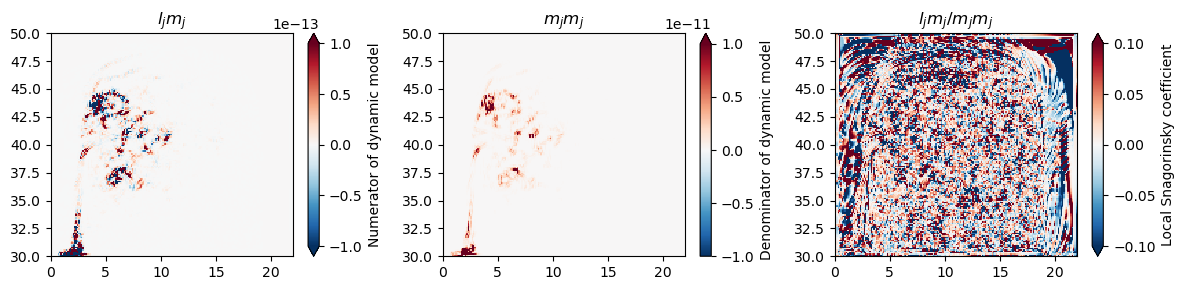

In [219]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
pg23.lm.isel(Time=-1,zl=0).plot(vmin=-1e-13, cbar_kwargs={'label':'Numerator of dynamic model'})
plt.title('$l_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,2)
pg23.mm.isel(Time=-1,zl=0).plot(vmin=-1e-11, cbar_kwargs={'label':'Denominator of dynamic model'})
plt.title('$m_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,3)
(pg23.lm / pg23.mm).isel(Time=-1,zl=0).plot(vmin=-0.1, cbar_kwargs={'label':'Local Snagorinsky coefficient'})
plt.title('$l_j m_j / m_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('germano_identity.png', dpi=180)

/opt/ohpc/pub/compiler/anaconda3/2024.02-1/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


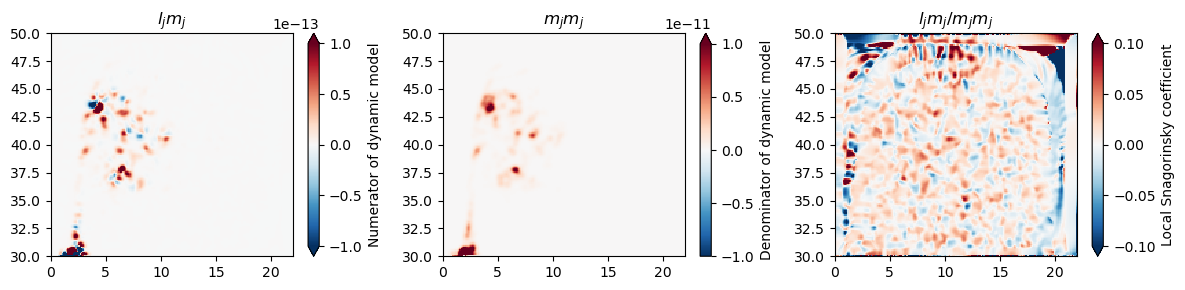

In [220]:
plt.figure(figsize=(12,3))
FGR = 5
plt.subplot(1,3,1)
filter(pg23.lm,FGR).isel(Time=-1,zl=0).plot(vmin=-1e-13, cbar_kwargs={'label':'Numerator of dynamic model'})
plt.title('$l_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,2)
filter(pg23.mm,FGR).isel(Time=-1,zl=0).plot(vmin=-1e-11, cbar_kwargs={'label':'Denominator of dynamic model'})
plt.title('$m_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,3,3)
(filter(pg23.lm,FGR) / filter(pg23.mm,FGR)).isel(Time=-1,zl=0).plot(vmin=-0.1, cbar_kwargs={'label':'Local Snagorinsky coefficient'})
plt.title('$l_j m_j / m_j m_j$')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('germano_identity_FGR5.png', dpi=180)

In [4]:
from helpers.collection_of_experiments import *

In [5]:
ds = CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments')

Error, cannot find files in folder/home/ctrsp-2024/pp2681/experiments/DSM-testing/offline_5cores/
Error, cannot find files in folder/home/ctrsp-2024/pp2681/experiments/DSM-testing/offline_16cores/


In [3]:
ds.exps

['DSM-offline',
 'DSM-testing-offline_5cores',
 'DSM-testing-offline_16cores',
 'R8-bare-0.06',
 'R8-bare-0.01',
 'R8-DSM-kappa-sqrt-6',
 'R8-DSM-kappa-sqrt-2',
 'R8-DSM-kappa-sqrt-2-plus',
 'Feb2022-bare-R32-output',
 'Feb2022-bare-R8-output']

In [11]:
def plot(idx):
    ds.plot_RV(['R8-DSM-kappa-sqrt-6', 'R8-DSM-kappa-sqrt-2',  'R8-DSM-kappa-sqrt-2-plus', 'Feb2022-bare-R32-output'], 
               ['$1/8^o, C_S=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{6} $',
                '$1/8^o, C_S=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{2} $', 
                '$1/8^o, C_S=\\frac{\\langle (l_j m_j)_{+} \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{2} $', '$1/32^o$'], ncols=2, 
               idx=[idx,idx,idx,idx//2])

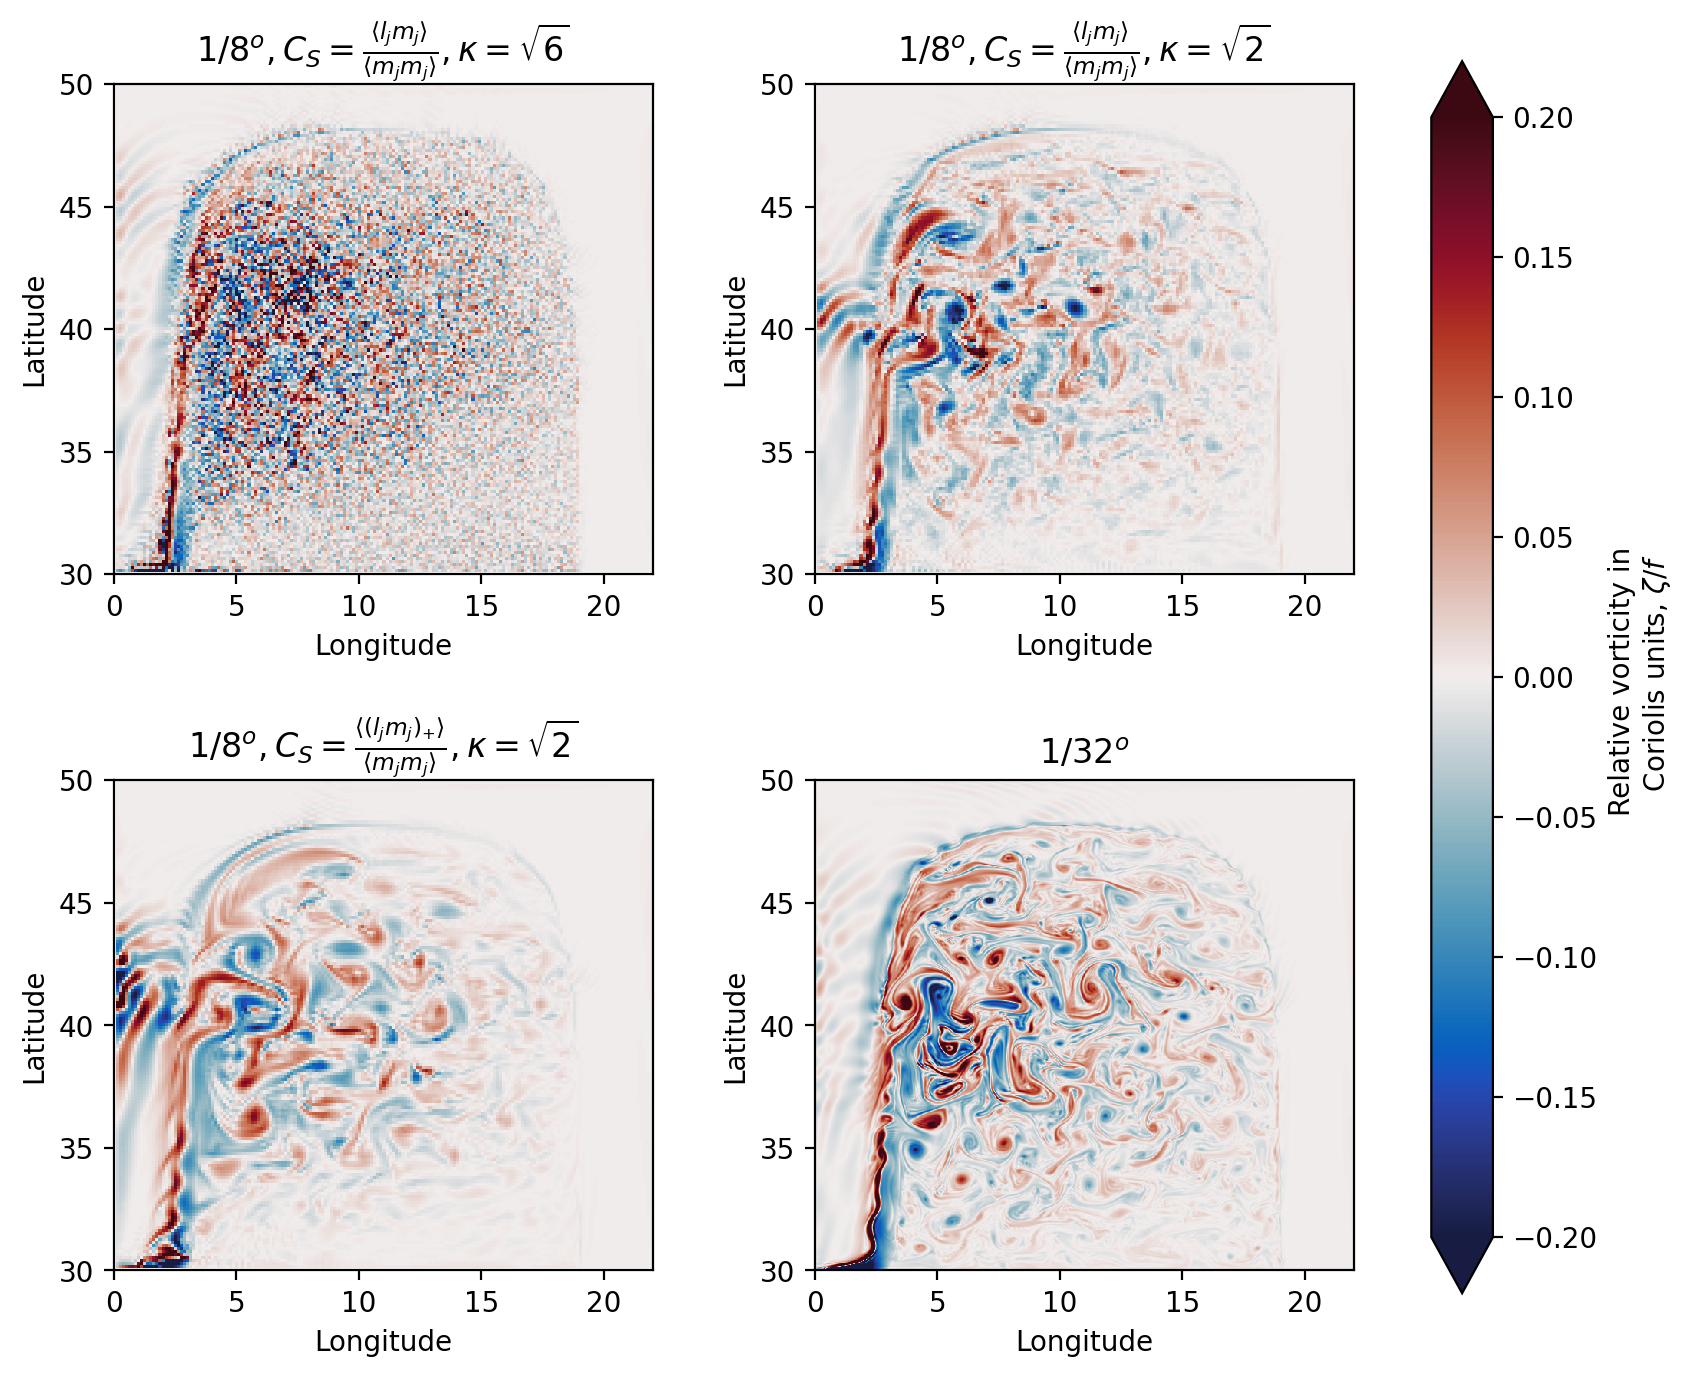

In [17]:
plot(400)

In [6]:
# from helpers.plot_helpers import *
# create_animation(plot, range(0,243), filename='my-video.gif', dpi=150, FPS=18)

In [ ]:
ds.plot_KE_spectrum(['R8-DSM-kappa-sqrt-6', 'R8-DSM-kappa-sqrt-2',  'R8-DSM-kappa-sqrt-2-plus', 'Feb2022-bare-R32-output'], 
               ['$1/8^o, C_S=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{6} $',
                '$1/8^o, C_S=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{2} $', 
                '$1/8^o, C_S=\\frac{\\langle (l_j m_j)_{+} \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{2} $', '$1/32^o$'])
plt.savefig('spectrum.png', dpi=180)

# Smagorinsky coefficient

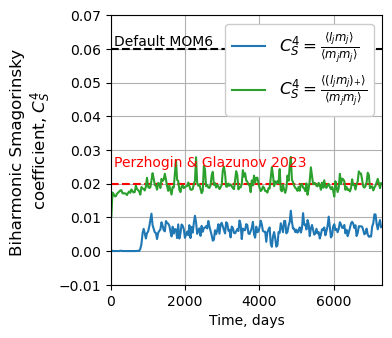

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3.5,3.5))

plt.axhline(y=0.02, ls='--', color='r')
plt.axhline(y=0.06, ls='--', color='k')
#ds['R8-DSM-kappa-sqrt-6'].series_diag.smag_const.isel(zl=0).coarsen({'Time':30}, boundary='trim').mean().plot(label='$C_S=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}, \kappa=\sqrt{6} $')
ds['R8-DSM-kappa-sqrt-2'].series_diag.smag_const.isel(zl=0).coarsen({'Time':30}, boundary='trim').mean().plot(label='$C_S^4=\\frac{\\langle l_j m_j \\rangle}{ \\langle m_j m_j \\rangle}$')
ds['R8-DSM-kappa-sqrt-2-plus'].series_diag.smag_const.isel(zl=0).coarsen({'Time':30}, boundary='trim').mean().plot(label='$C_S^4=\\frac{\\langle (l_j m_j)_{+} \\rangle}{ \\langle m_j m_j \\rangle}$', color='tab:green')

plt.legend(fontsize=12, framealpha=1)
plt.ylabel('Biharmonic Smagorinsky \ncoefficient, $C_S^4$', fontsize=12)
plt.ylim([-0.01,0.07])
plt.xlim([0,365*20])
plt.grid()
plt.xlabel('Time, days')

plt.text(100,0.061,'Default MOM6', color='k')
plt.text(100,0.025,'Perzhogin & Glazunov 2023', color='r')
plt.title('')
plt.savefig('smagorinsky_1.pdf', bbox_inches='tight')